In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sdf=pd.read_csv("summary_FF.csv")

In [3]:
sdf.Cluster=sdf.Cluster.astype(int)

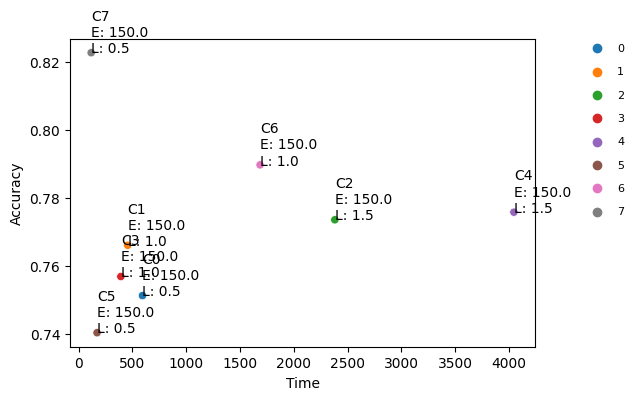

In [4]:
plt.figure(figsize=(6, 4))
# Create a scatter plot with computation time and accuracy as the x and y axes, respectively

# Generate a list of colors for all the unique hue levels in the data
n_clusters = sdf['Cluster'].nunique()
colors = sns.color_palette(n_colors=n_clusters)

sns_plot=sns.scatterplot(data=sdf, x="Time", y="Accuracy", hue="Cluster", palette=colors)


# Add annotations for the best estimator and learning rate for each point
for i in range(len(sdf)):
    plt.annotate(f"C{sdf.loc[i, 'Cluster']}\nE: {sdf.loc[i, 'estimators']}\nL: {sdf.loc[i, 'learning rate']}", 
                 (sdf.loc[i, 'Time'], sdf.loc[i, 'Accuracy']))

# Get the current axes object
ax = sns_plot.axes

# Set the size of the legend box using the `bbox_to_anchor` parameter
ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., fontsize=8, frameon=False, title_fontsize=14, markerscale=1, labelspacing=1.2)
    
plt.show()

In [5]:

df_0 = pd.read_csv('tune_results_cluster0.csv')
df_1 = pd.read_csv('tune_results_cluster1.csv')
df_2 = pd.read_csv('tune_results_cluster2.csv')
df_3 = pd.read_csv('tune_results_cluster3.csv')
df_4 = pd.read_csv('tune_results_cluster4.csv')
df_5 = pd.read_csv('tune_results_cluster5.csv')
df_6 = pd.read_csv('tune_results_cluster6.csv')
df_7 = pd.read_csv('tune_results_cluster7.csv')

#Mistakenly put duplicate results in cluster 2
df_2r=df_2.drop(index=range(24,49))
df_2r['mean_fit_time']=df_2r['mean_fit_time'].astype(float)
df_2r['mean_test_score']=df_2r['mean_test_score'].astype(float)


In [6]:
type(df_2r.mean_fit_time[0])

numpy.float64

In [7]:
df = pd.concat([df_0, df_1, df_2r, df_3, df_4, df_5, df_6, df_7], ignore_index=True)

In [8]:
print(df.columns)



Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_learning_rate',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score', 'Cluster'],
      dtype='object')


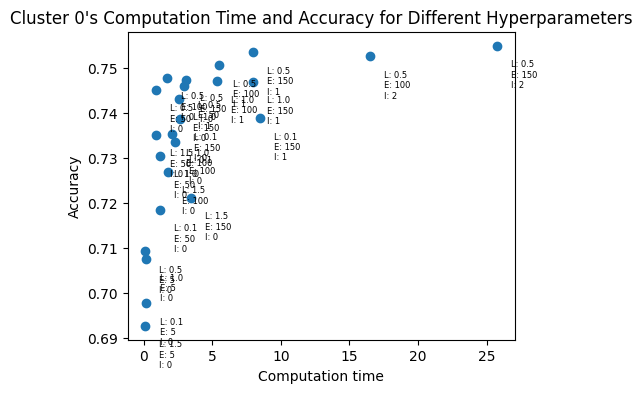

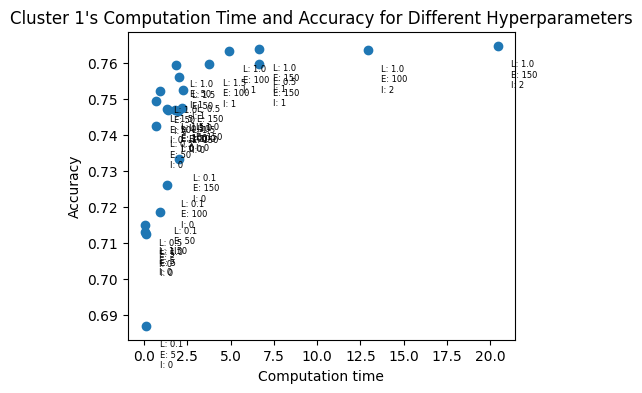

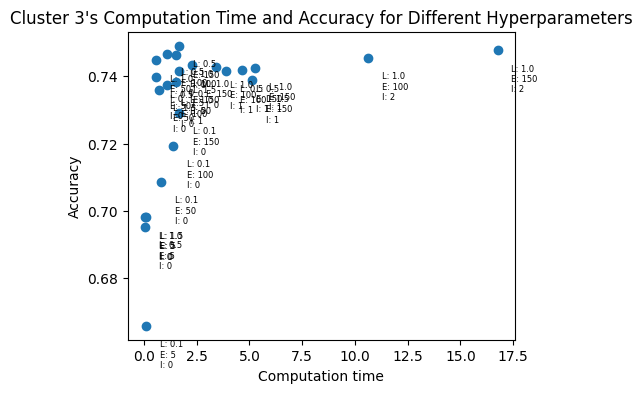

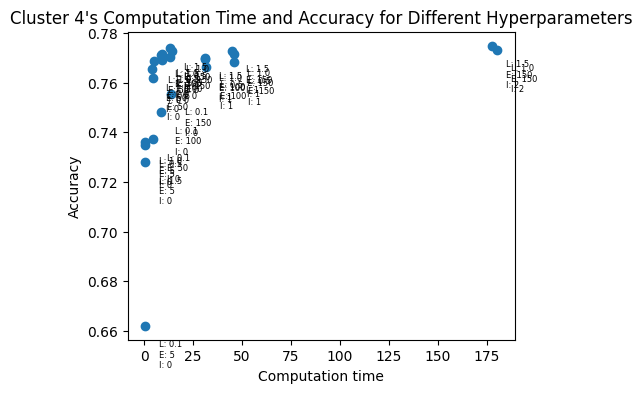

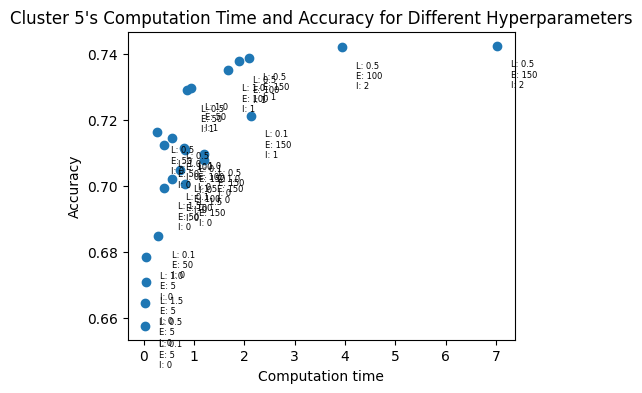

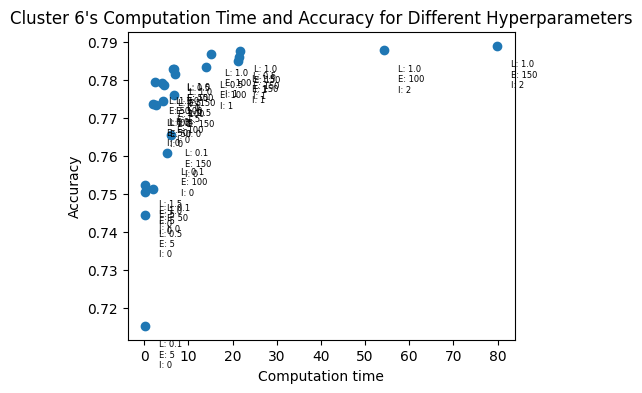

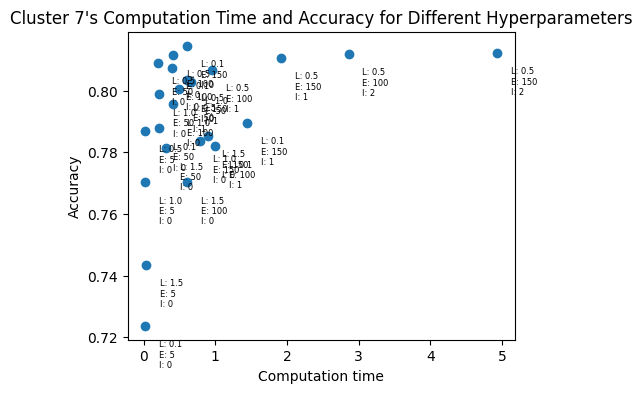

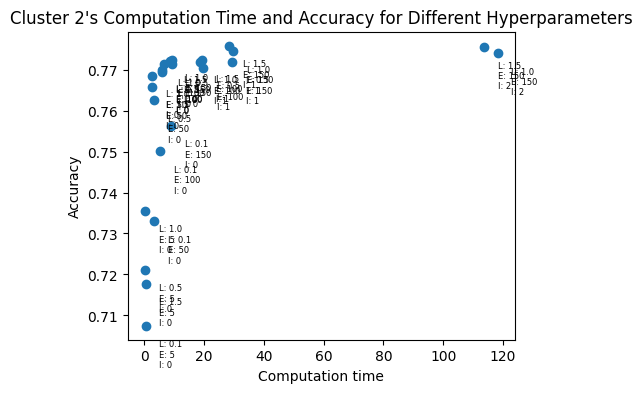

In [10]:

groups=df.groupby("Cluster")

for name, group in groups:
    plt.figure(figsize=(5, 4))

    plt.scatter(group['mean_fit_time'], group['mean_test_score'], label=name)
    for i, row in group.iterrows():
        plt.annotate("L: " + str(row['param_learning_rate']) + "\nE: " + str(row['param_n_estimators'])+ "\nI: " + str(row['iter']),
                     xy=(row['mean_fit_time'], row['mean_test_score']), xytext=(10, -10),
                     textcoords='offset points', ha='left', va='top',
                     fontsize=6)

    #  title and axis labels
    plt.title('Cluster {}\'s Computation Time and Accuracy for Different Hyperparameters'.format(name))
    plt.xlabel('Computation time')
    plt.ylabel('Accuracy')

    # show the plot
    plt.show()

